## Clustering con uso de librerias. Datos 1

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Datos

In [8]:
housingDF = pd.read_csv('data/info_Casas_SF.csv')
housingDF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [53]:
df_map = housingDF[['longitude', 'latitude']]
df_map.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [13]:
features = ['longitude', 'latitude']

In [15]:
from sklearn import preprocessing
df_map_standardized = preprocessing.scale(df_map[features])

## Definir número de agrupamientos óptimos con los métodos del codo y silueta

### Método del codo

In [41]:
iterations1 = []

for i in range(2, 16):
    model2 = KMeans(
            n_clusters=i, 
            max_iter=45, 
            n_init=1,
            random_state=45
        )
    
    model2.fit(df_map_standardized)
    iterations1.append(model2.inertia_)

### Método de la silueta

In [31]:
from sklearn.metrics import silhouette_score
iterations2 = []

for i in range(2, 16):
    model3 = KMeans(
            n_clusters=i, 
            max_iter=45, 
            n_init=1,
            random_state=45
        )
    labels1 = model3.fit_predict(df_map_standardized)
    sil_avg = silhouette_score(df_map_standardized, labels1)
    iterations2.append(sil_avg)

### Gráfica comparadora

In [26]:
#plt.figure(figsize=(8, 6))
#plt.plot(range(1, 16), codo1,"go--")
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

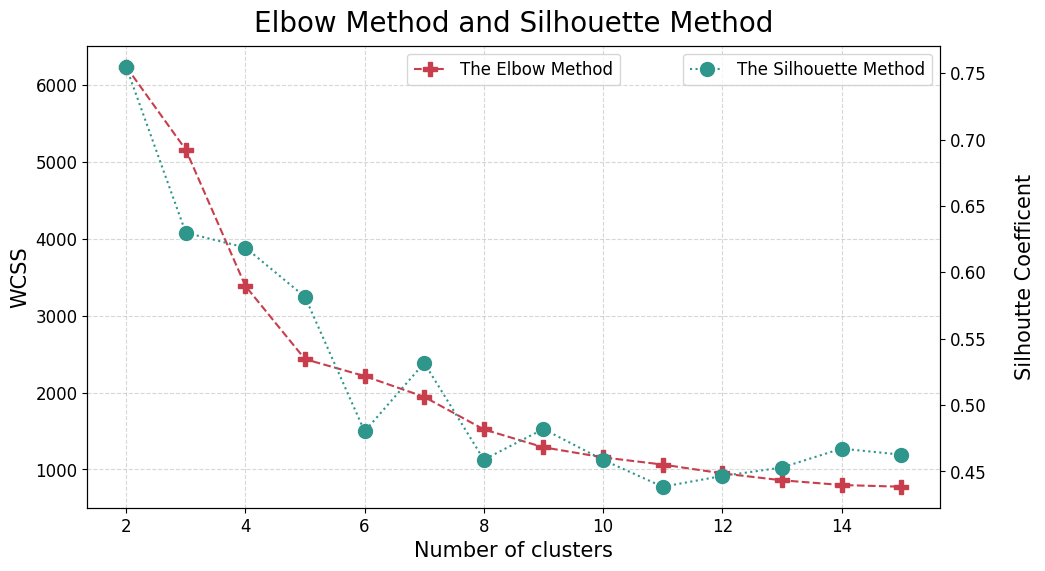

In [45]:
fig , ax1 = plt.subplots( figsize = (11 ,6) )

ax1.set_title('Elbow Method and Silhouette Method', size = 20, pad = 10 )

#--------------- WCSS -----------------
ax1.plot( range(2, 16), iterations1[:],
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )

#----------- optimal number of clusters -----------------
ax1.set_xlabel( 'Number of clusters', size = 15 )
ax1.set_ylabel('WCSS', size = 15 )
ax1.tick_params( axis = 'x', labelsize = 12 )
ax1.tick_params( axis = 'y', labelsize = 12 )

plt.legend(loc='upper center', prop = {'size':12})

# ------------- silhoutte coeff -------------
ax2 = ax1.twinx()
ax2.plot( range(2, 16), iterations2,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhouette Method'
        )

ax2.set_ylabel( '\nSilhoutte Coefficent', size = 15 )
ax2.tick_params( axis = 'y', labelsize = 12 )
plt.legend(loc=0, prop = {'size':12})

ax1.grid(  linestyle = 'dashed', alpha = 0.5 )

plt.show()

## Presentación final de datos en el mapa

In [46]:
clusters = 7
kmeans_model_Final = KMeans(
            n_clusters = clusters, 
            max_iter = 45, 
            n_init = 1,
            random_state = 45
        )
kmeans_model_Final.fit(df_map_standardized)
y_model = kmeans_model_Final.predict(df_map_standardized)

array([[ 0.67913303, -0.76367666],
       [-1.17877386,  1.02848616],
       [-1.35131322,  2.00168582],
       [-0.1178435 ,  0.61123733],
       [ 1.30603952, -1.27776625],
       [ 1.09649862, -0.76095752],
       [-0.02534335, -0.34178027]])

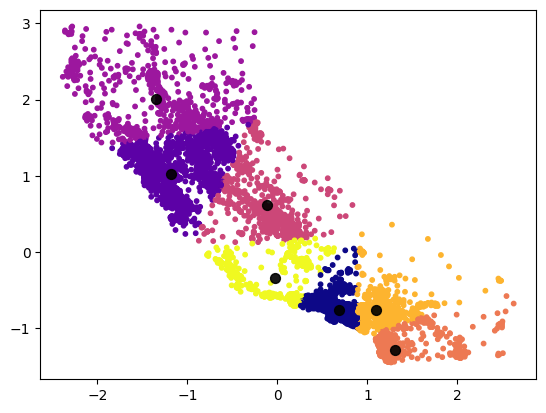

In [52]:
plt.scatter(df_map_standardized[:, 0], df_map_standardized[:, 1], c=y_model, s=10, cmap='plasma')
centers = kmeans_model_Final.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.9)
centers

### Visualización en mapa con folium

In [60]:
import folium
mapa1 = folium.Map(location=[37.50,-122.2], zoom_start=7, max_zoom=7, min_zoom=7)
